In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeRegressor


## Decision Tree Model


In [2]:
df = pd.read_csv('train.csv')

In [4]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


### Feature extraction


In [29]:
#print(df.columns)
#print(df.describe())
feature_names = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF","FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
df.loc[0:5, feature_names]

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9
5,14115,1993,796,566,1,1,5


In [14]:
X = df.loc[:, feature_names]

In [15]:
y = df.loc[:, 'SalePrice']


### Train - Validation - Test


In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, random_state=1)

### First Model


In [59]:
first_model = DecisionTreeRegressor(random_state=1)

# Fit the model
first_model.fit(X_train, Y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [64]:
train_predictions = first_model.predict(X_train)
print("In sample first predictions", train_predictions[0:5])

In sample first predictions [307000. 223500. 145000. 155000. 140000.]


In [65]:
val_predictions = first_model.predict(X_val)
print("Out sample first predictions", val_predictions[0:5])

Out sample first predictions [186500. 184000. 130000.  92000. 164500.]


###  Model Metrics


In [66]:
from sklearn.metrics import mean_absolute_error

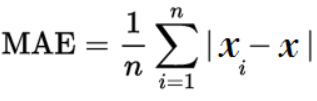


In [67]:
print("MAE in sample:", mean_absolute_error(Y_train, train_predictions))
print("MAE validation:", mean_absolute_error(Y_val, val_predictions))

MAE in sample: 61.85692541856926
MAE validation: 29652.931506849316


##### this shows how our model is overfiting the training set
